In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import seaborn as sns
import math
random.seed(36138)
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import AnovaRM
from pingouin import ancova

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from factor_analyzer import FactorAnalyzer
import pingouin as pg

/Users/calvinisch/opt/anaconda3/envs/new_project/lib/python3.8/site-packages/outdated/utils.py:14: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.2, the latest is 0.5.3.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


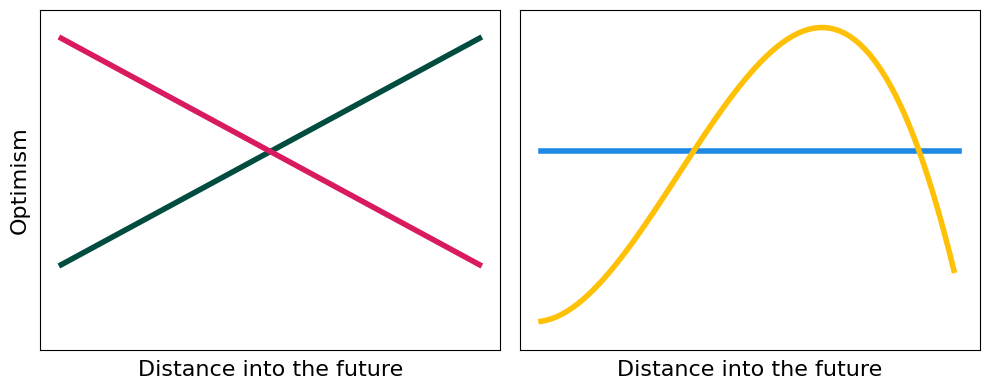

In [2]:
fig, axs = plt.subplots(1,2,figsize=(10,4))
fig.set_tight_layout(True)
axs[0].plot([0,1,2,3,4],[2,3,4,5,6],'-',color='#004D40',linewidth=4)
axs[0].plot([0,1,2,3,4],[6,5,4,3,2],'-',color='#D81B60',linewidth=4)
axs[0].set_ylim([0.5,6.5])


axs[0].axes.xaxis.set_ticks([])
axs[0].axes.yaxis.set_ticks([])
axs[0].set_xlabel('Distance into the future',fontsize=16)
axs[0].set_ylabel('Optimism',fontsize=16)


axs[1].plot([0,1,2,3,4],[4,4,4,4,4],'-',color='#1E88E5',linewidth=4)
axs[1].plot([x / 20 for x in range(80)],[(-(x/20)**3+4.76605*(x/22)**2+(x/40)) / 2 + 1 for x in range(80)],'-',color='#FFC107',linewidth=4)
axs[1].axes.xaxis.set_ticks([])
axs[1].axes.yaxis.set_ticks([])
axs[1].set_ylim([0.5,6.5])
axs[1].set_xlabel('Distance into the future',fontsize=16)
plt.savefig('plots/fig1_Theoretical_curves.png')
plt.show()

In [3]:
df = pd.read_csv('data/data.csv')
print('N =',df.loc[df['Finished.10']==1]['ID'].count())

N = 424


# Study 1

In [4]:
df_temp = df[['ID','Optimistic1.6','Optimistic2.6','Optimistic3.6','Optimistic4.6','Optimistic5.6',
              'Optimistic6.6','Optimistic7.6','Optimistic8.6','Optimistic9.6']]
df_temp = df_temp.dropna()
print('OC count',df_temp['ID'].count())

OC count 497


In [5]:
for var in ['Optimistic1.6','Optimistic2.6','Optimistic3.6','Optimistic4.6','Optimistic5.6',
              'Optimistic6.6','Optimistic7.6','Optimistic8.6','Optimistic9.6']:
    print(var,stats.normaltest(df_temp[var]))
    
print(stats.friedmanchisquare(df_temp['Optimistic1.6'],df_temp['Optimistic2.6'],df_temp['Optimistic3.6'],
                              df_temp['Optimistic4.6'],df_temp['Optimistic5.6'],df_temp['Optimistic6.6'],
                              df_temp['Optimistic7.6'],df_temp['Optimistic8.6'],df_temp['Optimistic9.6']))  

Optimistic1.6 NormaltestResult(statistic=164.8544888402312, pvalue=1.5933184673394513e-36)
Optimistic2.6 NormaltestResult(statistic=136.375710737683, pvalue=2.4343929436078634e-30)
Optimistic3.6 NormaltestResult(statistic=80.07321573263009, pvalue=4.095643335196426e-18)
Optimistic4.6 NormaltestResult(statistic=26.615871376072935, pvalue=1.661257540235647e-06)
Optimistic5.6 NormaltestResult(statistic=46.73504439680091, pvalue=7.105817569543415e-11)
Optimistic6.6 NormaltestResult(statistic=58.83432313672518, pvalue=1.6760580551316548e-13)
Optimistic7.6 NormaltestResult(statistic=57.151382513443984, pvalue=3.8880780158448797e-13)
Optimistic8.6 NormaltestResult(statistic=239.49483787610728, pvalue=9.870899565011083e-53)
Optimistic9.6 NormaltestResult(statistic=25700.711620749313, pvalue=0.0)
FriedmanchisquareResult(statistic=1049.4037786573056, pvalue=3.228025106371816e-221)


In [6]:
difs,best_time_frame,cors = [],[],[]

days = np.log10([2,7,4*7,6*30,365,365*5,3650,36500,365000])

# for every pereson
for i in range(df_temp['ID'].count()):
    person = df_temp.iloc[[i]].loc[:, df_temp.columns != 'ID'].sum()
    
    # find their max optimism, spread, and cor between positivity and distance in future
    difs.append(person.max() - person.min())
    best_time_frame.append(days[list(person).index(person.min())])
    cors.append(stats.spearmanr(person,days)[0])
df_temp['Peak Optimism'] = best_time_frame
df_temp['Dif min max'] = difs
df_temp['Cors'] = cors

df_level = df_temp.loc[df_temp['Dif min max'] <= 15] # was 15
df_t = df_temp.loc[df_temp['Dif min max'] > 15]
df_decreasing = df_t.loc[df_t['Cors']<=-.25]
df_increasing = df_t.loc[df_t['Cors']>=.8]
df_middle = df_t.loc[(df_t['Cors']<.8) & (df_t['Cors']>-.25)]

print(df_increasing['ID'].count(),df_decreasing['ID'].count(),
     df_level['ID'].count(),df_middle['ID'].count())

/Users/calvinisch/opt/anaconda3/envs/new_project/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


119 85 64 229


/var/folders/q9/lf93qdy52mdg6txk_rbwwp000000gp/T/ipykernel_96325/3342137201.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_yticklabels([0,0,20,40,60,80,100],fontsize=14)
/var/folders/q9/lf93qdy52mdg6txk_rbwwp000000gp/T/ipykernel_96325/3342137201.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_yticklabels([0,0,20,40,60,80,100],fontsize=14)


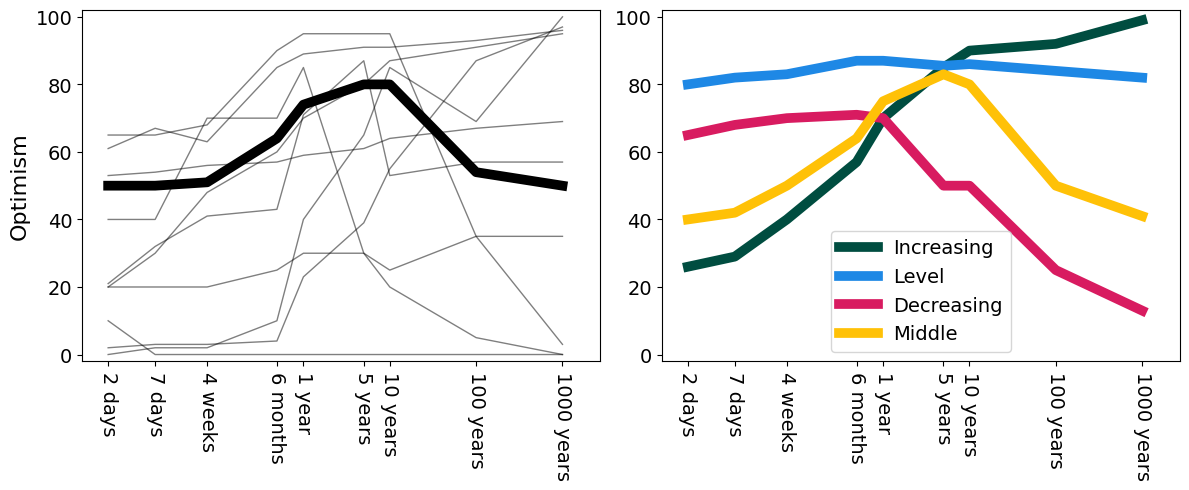

In [7]:


#person.idxmax()
fig, axs = plt.subplots(1,2,figsize=(12,5))

axs[0].set_ylim(-2,102)
axs[0].set_xlim(0,6)
axs[0].set_xticks(days)
axs[0].set_yticklabels([0,0,20,40,60,80,100],fontsize=14)
days = np.log10([2,7,4*7,6*30,365,365*5,3650,36500,365000])
axs[0].set_xticklabels(['2 days', '7 days', '4 weeks', '6 months', '1 year', '5 years', '10 years', '100 years',  '1000 years'],rotation=-90,fontsize=14)
axs[0].set_ylabel("Optimism",fontsize=16)


df_t = df_temp.sample(10)
for i in range(df_t['ID'].count()):
    person = df_t.iloc[[i]].loc[:, df_t.columns != 'ID'].sum()
    axs[0].plot(days,person[:9],'-',color='black',linewidth=1, alpha=.5)
    
axs[0].plot(days,[df_temp[i].median() for i in df_temp.columns[1:10]],'-',color='black',linewidth=7)

axs[1].set_ylim(-2,102)
axs[1].set_xlim(0,6)
axs[1].set_xticks(days)
axs[1].set_yticklabels([0,0,20,40,60,80,100],fontsize=14)
axs[1].set_xticklabels(['2 days', '7 days', '4 weeks', '6 months', '1 year', '5 years', '10 years', '100 years',  '1000 years'],rotation=-90,fontsize=14)

df_t = df_temp.loc[df_temp['ID'].isin(df_increasing['ID'])]
axs[1].plot(days,[df_t[i].median() for i in df_t.columns[1:10]],'-',color='#004D40',linewidth=7,label='Increasing')
df_t = df_temp.loc[df_temp['ID'].isin(df_level['ID'])]
axs[1].plot(days,[df_t[i].median() for i in df_t.columns[1:10]],'-',color='#1E88E5',linewidth=7,label='Level')
df_t = df_temp.loc[df_temp['ID'].isin(df_decreasing['ID'])]
axs[1].plot(days,[df_t[i].median() for i in df_t.columns[1:10]],'-',color='#D81B60',linewidth=7,label='Decreasing')
df_t = df_temp.loc[df_temp['ID'].isin(df_middle['ID'])]
axs[1].plot(days,[df_t[i].median() for i in df_t.columns[1:10]],'-',color='#FFC107',linewidth=7,label='Middle')
axs[1].legend(fontsize=14)

plt.tight_layout()
plt.savefig('plots/fig2_Optimism_Curves.png')
plt.show()

In [8]:
# Create Factors =========================================

df_temp = df[['Optimistic1.6','Optimistic2.6','Optimistic3.6','Optimistic4.6','Optimistic5.6',
              'Optimistic6.6','Optimistic7.6','Optimistic8.6','Optimistic9.6']]
x = df_temp.dropna()
fa = FactorAnalyzer()
fa.fit(x, 9)

#Get Eigen values and plot them
ev, v = fa.get_eigenvalues()
#plt.plot(range(1,x.shape[1]+1),[i/9*100 for i in ev],'o',ms=10)
#plt.ylabel("% Variance Explained",fontsize=14)
#plt.xlabel("Factor",fontsize=14)
#plt.show()
[print(i/9*100) for i in ev[:3]]

fa = FactorAnalyzer(3, rotation='varimax')
fa.fit(x)
loads = fa.loadings_

# Loading factor of .65 splits into these groups
# Factor 1 = '2 days', '7 days', '4 weeks', '6 months'
# Factor 2 = '1 year', '5 years', '10 years'
# Factor 3 = '100 years',  '1000 years'
# Near, medium, and distant future


#Create the factors
factor1 = df[['Optimistic1.6','Optimistic2.6','Optimistic3.6','Optimistic4.6','Optimistic5.6']]
factor2 = df[['Optimistic6.6','Optimistic7.6','Optimistic5.6']]
factor3 = df[['Optimistic8.6','Optimistic9.6']]
#Get cronbach alpha
factor1_alpha = pg.cronbach_alpha(factor1)
factor2_alpha = pg.cronbach_alpha(factor2)
factor3_alpha = pg.cronbach_alpha(factor3)
print("Alpha 1:",factor1_alpha, "Alpha 2:",factor2_alpha, "Alpha 3:", factor3_alpha)
new_variables = fa.fit_transform(x)

df_t = df[['ID','Optimistic1.6','Optimistic2.6','Optimistic3.6','Optimistic4.6','Optimistic5.6',
              'Optimistic6.6','Optimistic7.6','Optimistic8.6','Optimistic9.6']]
df_t = df_t.dropna()
df_temp['ID'] = df_t['ID']
df_factor = df_temp.dropna() 

df_factor['Factor1'] = new_variables[:,0]
df_factor['Factor2'] = new_variables[:,1]
df_factor['Factor3'] = new_variables[:,2]
df_factor = df_factor[['ID','Factor1','Factor2','Factor3']]



# Factor Loadings =========================================

a = ['2 days', '7 days', '4 weeks', '6 months', '1 year', '5 years', '10 years', '100 years',  '1000 years']
vals = [[],[],[],[]]
for i in range(len(a)):
    vals[0].append(a[i])
    vals[1].append(loads[i][0])
    vals[2].append(loads[i][1])
    vals[3].append(loads[i][2])
df_print = pd.DataFrame({'Var':vals[0],'Factor1':vals[1],'Factor2':vals[2],'Factor3':vals[3]})
#df_print

60.50019351947267
20.879463250632952
11.964127434030864
Alpha 1: (0.9432699306191854, array([0.937, 0.949])) Alpha 2: (0.9381701782373062, array([0.931, 0.945])) Alpha 3: (0.9313818392388111, array([0.922, 0.94 ]))


/var/folders/q9/lf93qdy52mdg6txk_rbwwp000000gp/T/ipykernel_96325/449338963.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['ID'] = df_t['ID']
/var/folders/q9/lf93qdy52mdg6txk_rbwwp000000gp/T/ipykernel_96325/449338963.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_factor['Factor1'] = new_variables[:,0]
/var/folders/q9/lf93qdy52mdg6txk_rbwwp000000gp/T/ipykernel_96325/449338963.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .lo

In [9]:

df_t = df[['ID','Optimistic1.6','Optimistic2.6','Optimistic3.6','Optimistic4.6','Optimistic5.6',
              'Optimistic6.6','Optimistic7.6','Optimistic8.6','Optimistic9.6']]
df_t = df_t.dropna()
near, med, far = [],[],[]
for i in range(df_t['Optimistic1.6'].count()):
    near.append(df_t[['Optimistic1.6','Optimistic2.6','Optimistic3.6','Optimistic4.6']].iloc[i,:].mean())
    med.append(df_t[['Optimistic6.6','Optimistic7.6','Optimistic5.6']].iloc[i,:].mean())
    far.append(df_t[['Optimistic8.6','Optimistic9.6']].iloc[i,:].mean())

df_factor['Near'] = near
df_factor['Med'] = med
df_factor['Far']= far

In [10]:
df_life_exp = pd.read_csv('External_data/US_A-Life-expectancy-CDC.csv') # from CDC USALEEP
df_life_exp = df_life_exp[['Tract ID','e(0)']]

df_inequality = pd.read_excel('External_data/Income_Inequality_by-county.xlsx') # From EPI: 
df_inequality = df_inequality[['County','Top-to-bottom ratio']]

df_income = pd.read_csv('External_data/ACSST5Y2019.S1903_data_with_overlays_2021-07-01T154811.csv') # American community survey 5-year family
df_income = df_income[['id','Geographic Area Name','Estimate!!Median income (dollars)!!FAMILIES!!Families']]


# ==================================== COUNTY LEVEL LIFE EXPECTANCY =========================================== #

df_zip_tract = pd.read_excel('External_data/ZIP_TRACT_122020.xlsx') # https://www.huduser.gov/portal/datasets/usps_crosswalk.html

# Get all census tracts aligned with a zip code.
df_temp = df[['ID','Zip.1']].dropna()
tracts = []
for z in df_temp['Zip.1']:
    tracts.append(list(df_zip_tract[['ZIP','TRACT']].loc[df_zip_tract['ZIP'] == z]['TRACT']))
df_temp['TRACTS'] = tracts

# Return average life expectancy for those.
life_exps = []
for i in df_temp['TRACTS']:
    df_t = df_life_exp.loc[df_life_exp['Tract ID'].isin(i)]
    life_exps.append(df_t['e(0)'].mean())
df_temp['County LE'] = life_exps    
df_factor= df_factor.merge(df_temp[['ID','County LE']], how='left',on='ID')

# ==================================== COUNTY LEVEL Median Income  =========================================== #

# Connect all Zip Codes to a county
df_zip_county = pd.read_excel('External_data/ZIP_COUNTY_122020.xlsx') # https://www.huduser.gov/portal/datasets/usps_crosswalk.html
df_temp = df[['ID','Zip.1']].dropna()
df_temp['ZIP'] = pd.to_numeric(df_temp['Zip.1'])
df_temp = df_temp[['ID','ZIP']].merge(df_zip_county[['ZIP','COUNTY']])

# Return County level income information
df_income['COUNTY'] = df_income['id'].apply(lambda x: int(str(x)[len(str(x))-5:]))
df_income['Median Family Income'] = df_income['Estimate!!Median income (dollars)!!FAMILIES!!Families']
df_temp = df_temp.merge(df_income[['COUNTY','Median Family Income']])
df_temp = df_temp.drop_duplicates(subset=['ID'])
df_factor= df_factor.merge(df_temp[['ID','Median Family Income']], how='left',on='ID')


# ==================================== COUNTY LEVEL Inequality =========================================== #
df_temp = df[['ID','Zip.1']].dropna()
df_temp['ZIP'] = pd.to_numeric(df_temp['Zip.1'])
df_temp = df_temp[['ID','ZIP']].merge(df_zip_county[['ZIP','COUNTY']])
df_temp = df_temp.merge(df_income[['COUNTY','Geographic Area Name']])

us_state_abbrev = {
    'Alabama': 'AL','Alaska': 'AK','American Samoa': 'AS','Arizona': 'AZ','Arkansas': 'AR',
    'California': 'CA','Colorado': 'CO','Connecticut': 'CT','Delaware': 'DE','District of Columbia': 'DC',
    'Florida': 'FL','Georgia': 'GA','Guam': 'GU','Hawaii': 'HI','Idaho': 'ID',
    'Illinois': 'IL','Indiana': 'IN','Iowa': 'IA','Kansas': 'KS','Kentucky': 'KY',
    'Louisiana': 'LA','Maine': 'ME','Maryland': 'MD','Massachusetts': 'MA','Michigan': 'MI',
    'Minnesota': 'MN','Mississippi': 'MS','Missouri': 'MO','Montana': 'MT','Nebraska': 'NE',
    'Nevada': 'NV','New Hampshire': 'NH','New Jersey': 'NJ','New Mexico': 'NM','New York': 'NY',
    'North Carolina': 'NC','North Dakota': 'ND','Northern Mariana Islands':'MP','Ohio': 'OH','Oklahoma': 'OK',
    'Oregon': 'OR','Pennsylvania': 'PA','Puerto Rico': 'PR','Rhode Island': 'RI','South Carolina': 'SC',
    'South Dakota': 'SD','Tennessee': 'TN','Texas': 'TX','Utah': 'UT','Vermont': 'VT',
    'Virgin Islands': 'VI','Virginia': 'VA','Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'
}

def rename_bad_label(label):
    s = ""
    
    try:
        # Get state and turn into 2 letter abbreviation
        state = label[label.index(',')+2:]
        state = us_state_abbrev[str(state)]
        
        # remove county label
        county = label[:label.index(',')-7]
        s = county + ', ' + state
    except:
        s = None
    return s

df_temp['County'] = df_temp['Geographic Area Name'].apply(lambda x: rename_bad_label(x))
df_temp = df_temp[['ID','County']].merge(df_inequality[['County','Top-to-bottom ratio']],how='left',on='County').drop_duplicates(subset='ID')
df_factor= df_factor.merge(df_temp[['ID','Top-to-bottom ratio']], how='left',on='ID')


In [11]:
print('Compare the ranges')
print(stats.wilcoxon(df_factor['Near'],df_factor['Med']))
print(stats.wilcoxon(df_factor['Near'],df_factor['Far']))
print(stats.wilcoxon(df_factor['Med'],df_factor['Far']),'\n')

# Factor correlates =========================================
def corrs(x,y):
    return stats.spearmanr(x,y)[0]
names = []
rs = [[],[],[]]
vs = ['Near','Med','Far']
for var_1 in ['LifeOrientation.10','CFC.Future.5','CFC.Immediate.5','b5_conscientious','b5_negemotion','b5_agreeable','b5_extroversion','SoPA.9','SoNA.9',
              'Age.1','Education.1','Wealth.6']:
    names.append(var_1)
    for v in range(len(vs)):
        var_2 = vs[v]
        df_temp = df_factor[['ID',var_2]].merge(df[['ID',var_1]],how="left",on='ID').dropna()
        fix_bad_names = []
        for a in df_temp[var_1]:
            if a == ' ':
                fix_bad_names.append(None)
            else:
                fix_bad_names.append(float(a))
        df_temp[var_1] = fix_bad_names
        df_temp = df_temp.dropna()
        r = stats.spearmanr(df_temp[var_1],df_temp[var_2])
        print(var_1,var_2,'N:',df_temp[var_1].count(),'R:',round(r[0],3),'P:',round(r[1],3))
        print(stats.bootstrap((df_temp[var_1],df_temp[var_2]),corrs,vectorized=False, paired=True,n_resamples=10000,confidence_level=0.95))
        rs[v].append(str(round(r[0],2))+' ('+str(round(r[1],3))+')')
        
vars_ = ['LifeOrientation.10','CFC.Future.5','CFC.Immediate.5','b5_conscientious','b5_negemotion', 'b5_agreeable','b5_extroversion','SoPA.9','SoNA.9',
              'Age.1','Education.1','Wealth.6']


for v in range(len(vs)):
    var_2 = vs[v]
    df_temp = df[['ID','Sex.1']].merge(df_factor[['ID',var_2]],how="left",on='ID').dropna()
    r = stats.mannwhitneyu(df_temp.loc[df_temp['Sex.1'] == 1][var_2],df_temp.loc[df_temp['Sex.1'] == 2][var_2])
    print('Sex.1',var_2,'N:',df_temp['Sex.1'].count(),'U:',round(r[0],3),'P:',round(r[1],3))
    print(df_temp.loc[df_temp['Sex.1'] == 1][var_2].median(),df_temp.loc[df_temp['Sex.1'] == 2][var_2].median())
    rs[v].append(str(round(r[0],2))+' ('+str(round(r[1],3))+')')
vars_.append('Sex')
print('Males = ',df_temp.loc[df_temp['Sex.1'] == 1][var_2].count())
print('Females = ',df_temp.loc[df_temp['Sex.1'] == 2][var_2].count())

f = ['Near','Med','Far']
for var_1 in ['County LE','Median Family Income','Top-to-bottom ratio']:
    for v in range(3):
        var_2 = f[v]
        df_temp = df_factor[[var_1,var_2]].dropna()
        r = stats.spearmanr(df_temp[var_1],df_temp[var_2])
        print(var_1,var_2,'N:',df_temp[var_1].count(),'R:',round(r[0],3),'P:',round(r[1],3))
        print(stats.bootstrap((df_temp[var_1],df_temp[var_2]),corrs,vectorized=False, paired=True,n_resamples=10000,confidence_level=0.95))
        rs[v].append(str(round(r[0],2))+' ('+str(round(r[1],3))+')')

vars_ = vars_ + ['County LE','Median Family Income','Top-to-bottom ratio']
        
df_print = pd.DataFrame({'Var':vars_,'Near':rs[0],'Med':rs[1],'Far':rs[2]})
df_print.to_csv('Tables/tab1_factors_cors.csv')

Compare the ranges
WilcoxonResult(statistic=11939.5, pvalue=2.456541134778818e-49)
WilcoxonResult(statistic=49796.5, pvalue=0.029595687585877346)
WilcoxonResult(statistic=22854.5, pvalue=2.4340197876405064e-26) 

LifeOrientation.10 Near N: 357 R: 0.386 P: 0.0
BootstrapResult(confidence_interval=ConfidenceInterval(low=0.28748873960288174, high=0.47707649730968416), standard_error=0.048241850259722344)
LifeOrientation.10 Med N: 357 R: 0.472 P: 0.0
BootstrapResult(confidence_interval=ConfidenceInterval(low=0.3823795915855639, high=0.5530493434411743), standard_error=0.04351285319383977)
LifeOrientation.10 Far N: 357 R: 0.369 P: 0.0
BootstrapResult(confidence_interval=ConfidenceInterval(low=0.2724297945625845, high=0.46571768630523913), standard_error=0.04895241757052888)
CFC.Future.5 Near N: 447 R: -0.002 P: 0.968
BootstrapResult(confidence_interval=ConfidenceInterval(low=-0.10021097118216908, high=0.09892470915207839), standard_error=0.05071455474128229)
CFC.Future.5 Med N: 447 R: 0.123 

# Study 2

In [12]:
for var_1 in ['TimeRiskyFriend.3','ContactsMask.6','Vaccine.6','ConcernCovid.6','WillingnessNeigh.6','WillingnessCountry.6',
            'Dospert','Fundamental1.2.6','Fundamental_af']:
    for var_2 in ['Factor1','Factor2','Factor3']:
        df_temp = df[['ID',var_1]].merge(df_factor[['ID',var_2]],how="left",on='ID').dropna()
        fix_bad_names = []
        for a in df_temp[var_1]:
            if a == ' ':
                fix_bad_names.append(None)
            else:
                fix_bad_names.append(float(a))
        r = stats.spearmanr(df_temp[var_1],df_temp[var_2])


In [13]:
def clean_var(a):
    b = None
    if a == ' ':
        b = None
    else:
        b = float(a)
    return b

vars_2 = ['Near','Med','Far']

vars_ = ['Dospert','ContactsMask.6','TimeRiskyFriend.3','Vaccine.6','ConcernCovid.6','WillingnessNeigh.6','WillingnessCountry.6','Fundamental1.2.6','Fundamental_af']
cors, r_one, r_two, p_change = [[[],[],[]],[],[],[]]

for var in vars_:
    df_temp = df[['ID',var,'LifeOrientation.10']].dropna()
    df_temp = df_temp.merge(df_factor[['ID','Near','Med','Far']], how='left')
    df_temp['LifeOrientation.10'] = df_temp['LifeOrientation.10'].apply(lambda x:clean_var(x))
    df_temp = df_temp.dropna()
    df_temp['LOT'] = df_temp['LifeOrientation.10']
    df_temp['var'] = df_temp[var]
    
    # regressions with and without grouping
    est = ols(formula='var ~ LOT + Near + Med + Far', data=df_temp).fit()
    est_2 = ols(formula='var ~ LOT', data=df_temp).fit()
    
    # hierarchical regression to determine if terms improve model fit
    anovaResults = anova_lm(est_2,est)
    print(var,'Regression',str(round(est.rsquared - est_2.rsquared,2))+' ('+str(round(anovaResults['Pr(>F)'][1],2))+')')
    r_one.append(round(est_2.rsquared,2))
    r_two.append(round(est.rsquared,2))
    p_change.append(str(round(anovaResults['Pr(>F)'][1],2)))
    
    for m in range(len(vars_2)):
        v = vars_2[m]          
        r = stats.spearmanr(df_temp[v],df_temp[var])
        cors[m].append(str(round(r[0],2))+' ('+str(round(r[1],2))+')')
        print(str(round(r[0],2))+' ('+str(round(r[1],2))+')')
df_regress = pd.DataFrame({'Variable':vars_,'LOT-R R2':r_one,'Expanded model R2':r_two,'p':p_change,
                          'Near':cors[0],'Med':cors[1],'Far':cors[2]})
df_regress.to_csv('Tables/tab2_Hierarchical-regression-lotr-factors.csv')

Dospert Regression 0.02 (0.17)
-0.0 (0.95)
0.06 (0.32)
-0.08 (0.15)
ContactsMask.6 Regression 0.03 (0.02)
-0.04 (0.46)
0.05 (0.36)
-0.08 (0.11)
TimeRiskyFriend.3 Regression 0.04 (0.01)
0.04 (0.46)
-0.08 (0.14)
0.01 (0.91)
Vaccine.6 Regression 0.07 (0.0)
0.02 (0.73)
0.15 (0.0)
-0.05 (0.36)
ConcernCovid.6 Regression 0.12 (0.0)
-0.3 (0.0)
-0.08 (0.14)
-0.17 (0.0)
WillingnessNeigh.6 Regression 0.01 (0.17)
0.16 (0.0)
0.17 (0.0)
0.2 (0.0)
WillingnessCountry.6 Regression 0.01 (0.16)
0.12 (0.02)
0.11 (0.04)
0.17 (0.0)
Fundamental1.2.6 Regression 0.06 (0.0)
-0.07 (0.19)
0.11 (0.04)
-0.01 (0.81)
Fundamental_af Regression 0.02 (0.03)
0.16 (0.0)
0.26 (0.0)
0.22 (0.0)


# Study 3

In [14]:
times_a = ['2 days', '7 days', '4 weeks', '6 months', '1 year', '5 years', '10 years', '100 years',  '1000 years']
times_b = ['2 days','2 weeks','2 months','1 year','10 years']

df_compare = df[['ID','Optimistic1.6','Optimistic2.6','Optimistic3.6','Optimistic4.6','Optimistic5.6',
              'Optimistic6.6','Optimistic7.6','Optimistic8.6','Optimistic9.6','Optimistic1.2','Optimistic2.2',
                 'Optimistic3.2','Optimistic4.2','Optimistic5.2']].dropna()

# Reverse October because higher numbers = more pessimistic 
for var in ['Optimistic1.2','Optimistic2.2','Optimistic3.2','Optimistic4.2','Optimistic5.2']:
    df_compare[var] = df_compare[var].apply(lambda x: 8 - int(x))

# z-score standardize all estimates
for col in ['Optimistic1.2','Optimistic1.6','Optimistic4.2','Optimistic5.6','Optimistic5.2','Optimistic7.6']:
    col_zscore = col + '_zscore'
    df_compare[col_zscore] = (df_compare[col] - df_compare[col].mean())/df_compare[col].std(ddof=0)

# Calculate the correlations between the same timepoints
print('N=',df_compare['Optimistic1.2'].count())
print('2 days',stats.spearmanr(df_compare['Optimistic1.2_zscore'],df_compare['Optimistic1.6_zscore']))
print('1 year',stats.spearmanr(df_compare['Optimistic4.2_zscore'],df_compare['Optimistic5.6_zscore']))
print('10 years',stats.spearmanr(df_compare['Optimistic5.2_zscore'],df_compare['Optimistic7.6_zscore']))


N= 423
2 days SpearmanrResult(correlation=0.3993924512492699, pvalue=1.2488797077421342e-17)
1 year SpearmanrResult(correlation=0.3775615043522972, pvalue=8.846041625159568e-16)
10 years SpearmanrResult(correlation=0.4776739065682616, pvalue=1.6983681826737878e-25)


In [15]:
# Calculate change in optimism over survey dates
df_compare['Change_2days'] = df_compare['Optimistic1.6'] - ((df_compare['Optimistic1.2']-1)*16.67)
df_compare['Change_1year'] = df_compare['Optimistic5.6'] - ((df_compare['Optimistic4.2']-1)*16.67)
df_compare['Change_10years'] = df_compare['Optimistic7.6'] - ((df_compare['Optimistic5.2']-1)*16.67)


# Add political orientation and look at changes
df_polit = df_compare.merge(df[['ID','PoliticalOrientation.1']],how='left').dropna()
df_left = df_polit.loc[df_polit['PoliticalOrientation.1'] < 4]  
df_right = df_polit.loc[df_polit['PoliticalOrientation.1'] > 4]
df_center = df_polit.loc[df_polit['PoliticalOrientation.1'] == 4]  


# Add concern covid to look at changes
df_compare = df_compare.merge(df[['ID','ConcernCovid.6']],how='left').dropna()
df_not = df_compare.loc[df_compare['ConcernCovid.6'] < 4]  
df_concern = df_compare.loc[df_compare['ConcernCovid.6'] > 4]

# Compare the changeby left and right
print("N right",df_right['Change_2days'].count(),'N left',df_left['Change_2days'].count(),df_center['Change_2days'].count())
print('2 days, Left:',round(df_left['Change_2days'].mean(),2),round(df_left['Change_2days'].std(),2),' - Right:', round(df_right['Change_2days'].mean(),2),round(df_right['Change_2days'].std(),2),
      'Mann whit:',stats.mannwhitneyu(df_left['Change_2days'],df_right['Change_2days']))
print('1 year, Left:',round(df_left['Change_1year'].mean(),2),round(df_left['Change_1year'].std(),2),' - Right:', round(df_right['Change_1year'].mean(),1),round(df_right['Change_1year'].std(),2),
      'Mann whit:',stats.mannwhitneyu(df_left['Change_1year'],df_right['Change_1year']))
print('10 years, Left:',round(df_left['Change_10years'].mean(),2),round(df_left['Change_10years'].std(),2),' - Right:', round(df_right['Change_10years'].mean(),1),round(df_right['Change_10years'].std(),2),
      'Mann whit:',stats.mannwhitneyu(df_left['Change_10years'],df_right['Change_10years']))


# Compare the change by concerned or not
print("\n N not",df_not['Change_2days'].count(),'N concerned',df_concern['Change_2days'].count(),df_compare.loc[df_compare['ConcernCovid.6'] == 4]['ID'].count()  )
print('2 days, Concerned:',round(df_concern['Change_2days'].mean(),2),round(df_concern['Change_2days'].std(),2),' - Not:', round(df_not['Change_2days'].mean(),2),round(df_not['Change_2days'].std(),2),
      'Mann whit:',stats.mannwhitneyu(df_concern['Change_2days'],df_not['Change_2days']))
print('1 year, Concerned:',round(df_concern['Change_1year'].mean(),2),round(df_concern['Change_1year'].std(),2),' - Not:', round(df_not['Change_1year'].mean(),1),round(df_not['Change_1year'].std(),2),
      'Mann whit:',stats.mannwhitneyu(df_concern['Change_1year'],df_not['Change_1year']))
print('10 years, Concerned:',round(df_left['Change_10years'].mean(),2),round(df_concern['Change_10years'].std(),2),' - Not:', round(df_not['Change_10years'].mean(),1),round(df_not['Change_10years'].std(),2),
      'Mann whit:',stats.mannwhitneyu(df_concern['Change_10years'],df_not['Change_10years']))
print(df_compare.loc[df_compare['ConcernCovid.6'] == 4]['ConcernCovid.6'].count())


N right 121 N left 226 75
2 days, Left: 0.75 29.39  - Right: -5.16 36.77 Mann whit: MannwhitneyuResult(statistic=15332.0, pvalue=0.06251206823130191)
1 year, Left: 9.29 27.91  - Right: -2.1 32.63 Mann whit: MannwhitneyuResult(statistic=16901.5, pvalue=0.0002886785884138307)
10 years, Left: 3.32 28.55  - Right: 0.0 29.52 Mann whit: MannwhitneyuResult(statistic=14614.0, pvalue=0.2905510000753604)

 N not 175 N concerned 191 56
2 days, Concerned: -3.98 33.39  - Not: 2.71 31.3 Mann whit: MannwhitneyuResult(statistic=14812.5, pvalue=0.060247164941052596)
1 year, Concerned: 8.02 30.44  - Not: 2.8 31.29 Mann whit: MannwhitneyuResult(statistic=18215.0, pvalue=0.13732778777262747)
10 years, Concerned: 3.32 31.46  - Not: 0.8 26.96 Mann whit: MannwhitneyuResult(statistic=17037.0, pvalue=0.748401858623728)
56


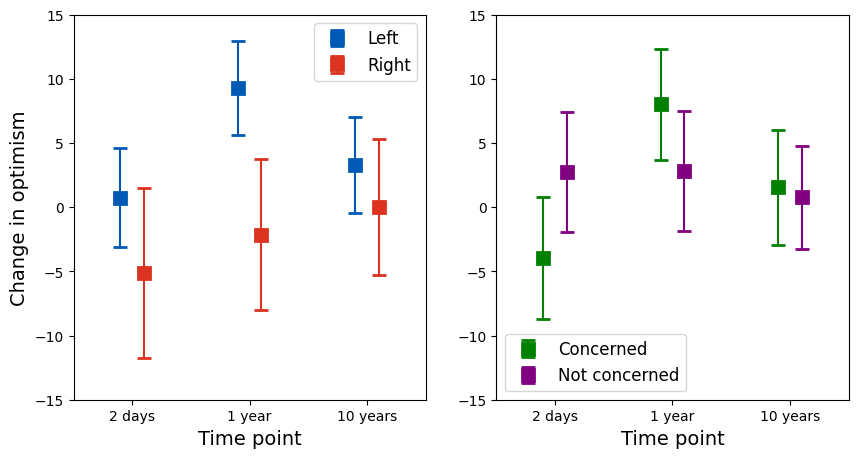

In [16]:
# Helper function for confidence intervals
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), stats.sem(a)
    h = se * stats.t.ppf((1 + confidence) / 2, n-1)
    return h


fig, axs = plt.subplots(1,2,figsize=(10,5))

axs[0].set_ylim(-15,15)
axs[0].set_xlim(0.5,3.5)

all_e = [mean_confidence_interval(df_left[tp]) for tp in ['Change_2days','Change_1year','Change_10years']]
axs[0].errorbar([.9,1.9,2.9], [df_left['Change_2days'].mean(),df_left['Change_1year'].mean(),df_left['Change_10years'].mean()], all_e, linestyle='None', marker='s', ecolor="#005AB5", mec="#005AB5", mfc="#005AB5", mew=2, ms=9, capsize=5,label='Left')

all_e = [mean_confidence_interval(df_right[tp]) for tp in ['Change_2days','Change_1year','Change_10years']]
axs[0].errorbar([1.1,2.1,3.1], [df_right['Change_2days'].mean(),df_right['Change_1year'].mean(),df_right['Change_10years'].mean()], all_e, linestyle='None', marker='s', ecolor="#DC3220", mec="#DC3220", mfc="#DC3220", mew=2, ms=9, capsize=5,label='Right')
axs[0].set_ylabel('Change in optimism',fontsize=14)
axs[0].set_xlabel('Time point',fontsize=14)
axs[0].set_xticks([1,2,3])
axs[0].set_xticklabels(['2 days','1 year','10 years'])
axs[0].legend(fontsize=12)

axs[1].set_ylim(-15,15)
axs[1].set_xlim(0.5,3.5)

all_e = [mean_confidence_interval(df_concern[tp]) for tp in ['Change_2days','Change_1year','Change_10years']]
axs[1].errorbar([1-.1,2-.1,3-.1], [df_concern['Change_2days'].mean(),df_concern['Change_1year'].mean(),df_concern['Change_10years'].mean()], all_e, linestyle='None', marker='s', ecolor="green", mec="green", mfc="green", mew=2, ms=9, capsize=5,label='Concerned')

all_e = [mean_confidence_interval(df_not[tp]) for tp in ['Change_2days','Change_1year','Change_10years']]
axs[1].errorbar([1+.1,2+.1,3+.1], [df_not['Change_2days'].mean(),df_not['Change_1year'].mean(),df_not['Change_10years'].mean()], all_e, linestyle='None', marker='s', ecolor="purple", mec="purple", mfc="purple", mew=2, ms=9, capsize=5,label='Not concerned')
axs[1].set_xlabel('Time point',fontsize=14)
axs[1].set_xticks([1,2,3])
axs[1].set_xticklabels(['2 days','1 year','10 years'])
axs[1].legend(fontsize=12)
plt.savefig('plots/fig3_Change over time.png')
plt.show()

# Study 4

In [17]:
df_temp = df[['ID','Optimistic1.6','Optimistic2.6','Optimistic3.6','Optimistic4.6',
              'Optimistic5.6','Optimistic6.6','Optimistic7.6','Optimistic8.6','Optimistic9.6',
              'PositiveRightNow1.9','PositiveLife1.9','PositiveLife2.9','PositiveLife3.9',
              'PositiveLife4.9','PositiveLife5.9','PositiveLife6.9','PositiveRightNow2.9',
              'PositiveWorld1.9','PositiveWorld2.9','PositiveWorld3.9','PositiveWorld4.9',
              'PositiveWorld5.9','PositiveWorld6.9','PositiveWorld8.9','PositiveWorld9.9']]


vars_ = ['Optimistic1.6','PositiveRightNow1.9','PositiveRightNow2.9']
df_t = df_temp[vars_].dropna()
print('\nNOW!!!-- N:',df_t[vars_[1]].count())
for var in vars_:
    print('var',df_t[var].median())
print('Gen - Life',stats.ttest_rel(df_t[vars_[0]],df_t[vars_[1]]),'\n',stats.spearmanr(df_t[vars_[0]],df_t[vars_[1]]))
print('Gen - World',stats.ttest_rel(df_t[vars_[0]],df_t[vars_[2]]),'\n',stats.spearmanr(df_t[vars_[0]],df_t[vars_[2]]))
print('Life - World',stats.ttest_rel(df_t[vars_[1]],df_t[vars_[2]]),'\n',stats.spearmanr(df_t[vars_[1]],df_t[vars_[2]]))


vars_ = ['Optimistic3.6','PositiveLife1.9','PositiveWorld1.9']
df_t = df_temp[vars_].dropna()
print('\n1 month -- N:',df_t[vars_[1]].count())
for var in vars_:
    print('var',df_t[var].median())
print('Gen - Life',stats.ttest_rel(df_t[vars_[0]],df_t[vars_[1]]),'\n',stats.spearmanr(df_t[vars_[0]],df_t[vars_[1]]))
print('Gen - World',stats.ttest_rel(df_t[vars_[0]],df_t[vars_[2]]),'\n',stats.spearmanr(df_t[vars_[0]],df_t[vars_[2]]))
print('Life - World',stats.ttest_rel(df_t[vars_[1]],df_t[vars_[2]]),'\n',stats.spearmanr(df_t[vars_[1]],df_t[vars_[2]]))

vars_ = ['Optimistic5.6','PositiveLife2.9','PositiveWorld2.9']
df_t = df_temp[vars_].dropna()
print('\n1 year -- N:',df_t[vars_[1]].count())
for var in vars_:
    print('var',df_t[var].median())
print('Gen - Life',stats.ttest_rel(df_t[vars_[0]],df_t[vars_[1]]),'\n',stats.spearmanr(df_t[vars_[0]],df_t[vars_[1]]))
print('Gen - World',stats.ttest_rel(df_t[vars_[0]],df_t[vars_[2]]),'\n',stats.spearmanr(df_t[vars_[0]],df_t[vars_[2]]))
print('Life - World',stats.ttest_rel(df_t[vars_[1]],df_t[vars_[2]]),'\n',stats.spearmanr(df_t[vars_[1]],df_t[vars_[2]]))

vars_ = ['Optimistic7.6','PositiveLife3.9','PositiveWorld3.9']
df_t = df_temp[vars_].dropna()
print('\n10 years -- N:',df_t[vars_[1]].count())
for var in vars_:
    print('var',df_t[var].median())
print('Gen - Life',stats.ttest_rel(df_t[vars_[0]],df_t[vars_[1]]),'\n',stats.spearmanr(df_t[vars_[0]],df_t[vars_[1]]))
print('Gen - World',stats.ttest_rel(df_t[vars_[0]],df_t[vars_[2]]),'\n',stats.spearmanr(df_t[vars_[0]],df_t[vars_[2]]))
print('Life - World',stats.ttest_rel(df_t[vars_[1]],df_t[vars_[2]]),'\n',stats.spearmanr(df_t[vars_[1]],df_t[vars_[2]]))


vars_ = ['PositiveLife4.9','PositiveWorld4.9']
df_t = df_temp[vars_].dropna()
print('\n20 years -- N:',df_t[vars_[1]].count())
for var in vars_:
    print('var',df_t[var].median())
print('Life - World',stats.ttest_rel(df_t[vars_[0]],df_t[vars_[1]]),'\n',stats.spearmanr(df_t[vars_[0]],df_t[vars_[1]]))
days = np.log10([2,30,365,3650,365*20,365*50,365*80])

vars_ = ['PositiveLife5.9','PositiveWorld5.9']
df_t = df_temp[vars_].dropna()
print('\n50 years -- N:',df_t[vars_[1]].count())
for var in vars_:
    print('var',df_t[var].median())
print('Life - World',stats.ttest_rel(df_t[vars_[0]],df_t[vars_[1]]),'\n',stats.spearmanr(df_t[vars_[0]],df_t[vars_[1]]))
days = np.log10([2,30,365,3650,365*20,365*50,365*80])

vars_ = ['PositiveLife6.9','PositiveWorld6.9']
df_t = df_temp[vars_].dropna()
print('\n80 years -- N:',df_t[vars_[1]].count())
for var in vars_:
    print('var',df_t[var].median())
print('Life - World',stats.ttest_rel(df_t[vars_[0]],df_t[vars_[1]]),'\n',stats.spearmanr(df_t[vars_[0]],df_t[vars_[1]]))
days = np.log10([2,30,365,3650,365*20,365*50,365*80])


vars_ = ['Optimistic8.6','PositiveWorld8.9']
df_t = df_temp[vars_].dropna()
print('\n100 years -- N:',df_t[vars_[1]].count())
for var in vars_:
    print('var',df_t[var].median())
print('Gen - World',stats.ttest_rel(df_t[vars_[0]],df_t[vars_[1]]),'\n',stats.spearmanr(df_t[vars_[0]],df_t[vars_[1]]))

vars_ = ['Optimistic9.6','PositiveWorld9.9']
df_t = df_temp[vars_].dropna()
print('\n1,000 years -- N:',df_t[vars_[1]].count())
for var in vars_:
    print('var',df_t[var].median())
print('Gen - World',stats.ttest_rel(df_t[vars_[0]],df_t[vars_[1]]),'\n',stats.spearmanr(df_t[vars_[0]],df_t[vars_[1]]))



NOW!!!-- N: 375
var 50.0
var 72.0
var 55.0
Gen - Life Ttest_relResult(statistic=-15.549496742023958, pvalue=2.0890416623433818e-42) 
 SpearmanrResult(correlation=0.362032420586894, pvalue=4.683597330771833e-13)
Gen - World Ttest_relResult(statistic=-4.645117400374517, pvalue=4.7148997395342164e-06) 
 SpearmanrResult(correlation=0.3390420001680268, pvalue=1.5366772848755986e-11)
Life - World Ttest_relResult(statistic=14.946896301483342, pvalue=6.179599495838423e-40) 
 SpearmanrResult(correlation=0.579537710808802, pvalue=5.027959581358864e-35)

1 month -- N: 375
var 51.0
var 70.0
var 56.0
Gen - Life Ttest_relResult(statistic=-10.678871972183707, pvalue=2.057379503779915e-23) 
 SpearmanrResult(correlation=0.424212854522081, pvalue=8.197085378045162e-18)
Gen - World Ttest_relResult(statistic=-1.9877523302163678, pvalue=0.04756788585118357) 
 SpearmanrResult(correlation=0.4084026187143698, pvalue=1.6578594792850399e-16)
Life - World Ttest_relResult(statistic=11.067474110498809, pvalue=8.0

In [18]:
# First plot self
df_temp = df[['ID','PositiveRightNow1.9','PositiveLife1.9','PositiveLife2.9',
              'PositiveLife3.9','PositiveLife4.9','PositiveLife5.9','PositiveLife6.9']].dropna()
days = np.log10([2,30,365,3650,365*20,365*50,365*80])
medians = [df_temp[x].median() for x in ['PositiveRightNow1.9','PositiveLife1.9','PositiveLife2.9',
              'PositiveLife3.9','PositiveLife4.9','PositiveLife5.9','PositiveLife6.9']]
times = ['Now','1 month','1 year','10 years','20 years','50 years','80 years']
print("LIFE --------")
for i in range(len(times)):
    print(times[i],medians[i])

df_temp = df[['ID','PositiveRightNow2.9','PositiveWorld1.9','PositiveWorld2.9',
              'PositiveWorld3.9','PositiveWorld4.9','PositiveWorld5.9','PositiveWorld6.9',
              'PositiveWorld8.9','PositiveWorld9.9']].dropna()
days = np.log10([2,30,365,3650,365*20,365*50,365*80,365 * 100, 365 * 1000])
medians = [df_temp[x].median() for x in ['PositiveRightNow2.9','PositiveWorld1.9','PositiveWorld2.9','PositiveWorld3.9',
                                     'PositiveWorld4.9','PositiveWorld5.9','PositiveWorld6.9','PositiveWorld8.9','PositiveWorld9.9']]
times = ['Now','1 month','1 year','10 years','20 years','50 years','80 years','100 years','1,000 years']
print('\nWORLD-------')
for i in range(len(times)):
    print(times[i],medians[i])

df_temp = df[['ID','Optimistic1.6','Optimistic3.6','Optimistic5.6','Optimistic7.6',
              'Optimistic8.6','Optimistic9.6']].dropna()
   
medians = [df_temp[x].median() for x in ['Optimistic1.6','Optimistic3.6','Optimistic5.6','Optimistic7.6',
              'Optimistic8.6','Optimistic9.6']]
times = ['Now','1 month','1 year','10 years','100 years','1,000 years']
print("LIFE --------")
for i in range(len(times)):
    print(times[i],medians[i])

LIFE --------
Now 73.0
1 month 70.0
1 year 74.5
10 years 71.5
20 years 61.0
50 years 15.5
80 years 0.0

WORLD-------
Now 53.0
1 month 55.0
1 year 60.0
10 years 62.0
20 years 60.0
50 years 55.0
80 years 52.0
100 years 51.0
1,000 years 50.0
LIFE --------
Now 50.0
1 month 51.0
1 year 74.0
10 years 80.0
100 years 54.0
1,000 years 50.0


In [19]:
df_temp = df[['LifeExpectancy.9','Age.1']].dropna()

# How long does participant expect to live?
df_temp['Years_left'] = df_temp['LifeExpectancy.9'] - df_temp['Age.1']
print('Years Left: M=',df_temp['Years_left'].mean(),"-- SD=",df_temp['Years_left'].std())
print('Age: M=',df_temp['Age.1'].mean(),"-- SD=",df_temp['Age.1'].std())
print('LE: M=',df_temp['LifeExpectancy.9'].mean(),"-- SD=",df_temp['LifeExpectancy.9'].std())

# Cut point for optimism
def cut_point(years):
    cp = ['PositiveRightNow1.9']
    if years < 1:
        cp = ['PositiveRightNow1.9','PositiveLife1.9']
    elif years <= 10:
        cp = ['PositiveRightNow1.9','PositiveLife1.9','PositiveLife2.9']
    elif years < 20:
        cp = ['PositiveRightNow1.9','PositiveLife1.9','PositiveLife2.9','PositiveLife3.9']
    elif years < 50:
        cp = ['PositiveRightNow1.9','PositiveLife1.9','PositiveLife2.9','PositiveLife3.9','PositiveLife4.9']
    elif years < 80:
        cp = ['PositiveRightNow1.9','PositiveLife1.9','PositiveLife2.9',
              'PositiveLife3.9','PositiveLife4.9','PositiveLife5.9']
    else:
        cp = ['PositiveRightNow1.9','PositiveLife1.9','PositiveLife2.9',
              'PositiveLife3.9','PositiveLife4.9','PositiveLife5.9','PositiveLife6.9']
    return(cp)

df_temp = df[['ID','PositiveRightNow1.9','PositiveLife1.9','PositiveLife2.9',
              'PositiveLife3.9','PositiveLife4.9','PositiveLife5.9','PositiveLife6.9',
              'LifeExpectancy.9','Age.1']].dropna()
df_temp['Years_left'] = df_temp['LifeExpectancy.9'] - df_temp['Age.1']
df_temp['Cut-point'] = df_temp['Years_left'].apply(lambda x: cut_point(x))
means, cors, counts = [], [],[]
days = np.log10([2,30,365,3650,365*20,365*50,365*80])
for i in range(df_temp['ID'].count()):
    a = list(df_temp.iloc[[i]]['Cut-point'])[0]
    person = df_temp.iloc[[i]][a].sum()
    means.append(person.mean())
    cors.append(stats.spearmanr(person,days[:len(a)])[0])#person[:7],days[:7])[0])
    counts.append(len(a))
df_ocs_self = pd.DataFrame({'ID':df_temp['ID'],'Mean_Optimism':means,'Cor_Optimism':cors,'Counts':counts})
print("\n\nSelf info:")
for col in ['Mean_Optimism', 'Cor_Optimism', 'Counts']:
    print(col,df_ocs_self[col].mean(),df_ocs_self[col].std())
print('Abs Cor',df_ocs_self['Cor_Optimism'].apply(lambda x:abs(x)).mean())


# Calculate means and slopes for world
df_temp = df[['ID','PositiveRightNow2.9','PositiveWorld1.9','PositiveWorld2.9',
              'PositiveWorld3.9','PositiveWorld4.9','PositiveWorld5.9','PositiveWorld6.9',
              'PositiveWorld8.9','PositiveWorld9.9']].dropna()
means, cors = [], []
days = np.log10([2,30,365,3650,365*20,365*50,365*80,365 * 100, 365 * 1000])
for i in range(df_temp['ID'].count()):
    person = df_temp.iloc[[i]].loc[:, df_temp.columns != 'ID'].sum()
    means.append(person.mean())
    cors.append(stats.spearmanr(person,days)[0])#person[:7],days[:7])[0])

df_ocs_world = pd.DataFrame({'ID':df_temp['ID'],'Mean_Optimism':means,'Cor_Optimism':cors})
print('\n\nSociety info')
for col in [ 'Mean_Optimism', 'Cor_Optimism']:
    print(col,df_ocs_world[col].mean(),df_ocs_world[col].std())
print('Abs Cor',df_ocs_world['Cor_Optimism'].apply(lambda x:abs(x)).mean())



df_temp = df[['ID','Optimistic1.6','Optimistic2.6','Optimistic3.6','Optimistic4.6','Optimistic5.6',
              'Optimistic6.6','Optimistic7.6','Optimistic8.6','Optimistic9.6']]
df_temp = df_temp.dropna()

means, cors = [], []
days = np.log10([2,7,4*7,6*30,365,365*5,3650,36500,365000])

for i in range(df_temp['ID'].count()):
    person = df_temp.iloc[[i]].loc[:, df_temp.columns != 'ID'].sum()
    means.append(person.mean())
    cors.append(stats.spearmanr(person,days)[0])#person[:7],days[:7])[0])

df_ocs = pd.DataFrame({'ID':df_temp['ID'],'Mean_Optimism':means,'Cor_Optimism':cors})

print('\n\nGeneral info')
for col in [ 'Mean_Optimism', 'Cor_Optimism']:
    print(col,df_ocs[col].mean(),df_ocs[col].std())
print('Abs Cor',df_ocs['Cor_Optimism'].apply(lambda x:abs(x)).mean())

Years Left: M= 32.751196172248804 -- SD= 49.05334355732818
Age: M= 51.961722488038276 -- SD= 14.176972205333966
LE: M= 84.71291866028709 -- SD= 46.39496660450545


/Users/calvinisch/opt/anaconda3/envs/new_project/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/calvinisch/opt/anaconda3/envs/new_project/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/calvinisch/opt/anaconda3/envs/new_project/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))
/Users/calvinisch/opt/anaconda3/envs/new_project/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.Constant



Self info:
Mean_Optimism 67.91255144032924 22.34787125510291
Cor_Optimism -0.01443709424813781 0.6779107288142067
Counts 4.77283950617284 0.860435698070815
Abs Cor 0.6053215597188694


/Users/calvinisch/opt/anaconda3/envs/new_project/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))




Society info
Mean_Optimism 53.732732732732714 23.180270576324393
Cor_Optimism -0.022266478405912206 0.7058742585802893
Abs Cor 0.6391877593430902


/Users/calvinisch/opt/anaconda3/envs/new_project/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4878: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))




General info
Mean_Optimism 58.1509054325956 22.179815187456484
Cor_Optimism 0.28323581056314884 0.5945443259680578
Abs Cor 0.572668518117065


In [20]:
# Group into factors from study 1.
df_temp = df[['PositiveRightNow1.9','PositiveLife1.9','PositiveLife2.9',
              'PositiveLife3.9','PositiveRightNow2.9','PositiveWorld1.9','PositiveWorld2.9',
              'PositiveWorld3.9','PositiveWorld8.9','PositiveWorld9.9','Optimistic1.6',
              'Optimistic3.6','Optimistic5.6','Optimistic7.6','Optimistic8.6','Optimistic9.6']].dropna()

# First look at near
print('Near Future')
df_temp['LifeNear']= df_temp['PositiveRightNow1.9'] + df_temp['PositiveLife1.9']
df_temp['WorldNear'] = df_temp['PositiveRightNow2.9'] + df_temp['PositiveWorld1.9']
df_temp['GeneralNear'] = df_temp['Optimistic1.6'] + df_temp['Optimistic3.6']

# General is predictor. Add a constant to it
x = df_temp[['GeneralNear']]
x = sm.add_constant(x)

# Look at life and world
y = df_temp['LifeNear']
model = sm.OLS(y, x).fit()
print('Life RMSE:',round(np.sqrt(np.mean((model.fittedvalues - y)**2)),2))
y = df_temp['WorldNear']
model2 = sm.OLS(y, x).fit()
print('World RMSE:',round(np.sqrt(np.mean((model2.fittedvalues - y)**2)),2))
print('TTest',stats.ttest_rel(np.sqrt((model.fittedvalues - y)**2),np.sqrt((model2.fittedvalues - y)**2)))


# Now look at medium
print('Medium future')
df_temp['LifeMed']= df_temp['PositiveLife2.9'] + df_temp['PositiveLife3.9']
df_temp['WorldMed'] = df_temp['PositiveWorld2.9'] + df_temp['PositiveWorld3.9']
df_temp['GeneralMed'] = df_temp['Optimistic5.6'] + df_temp['Optimistic7.6']

# General is predictor. Add a constant to it
x = df_temp[['GeneralMed']]
x = sm.add_constant(x)

# Look at life and world
y = df_temp['LifeMed']
model = sm.OLS(y, x).fit()
print('Life RMSE:',round(np.sqrt(np.mean((model.fittedvalues - y)**2)),2))
y = df_temp['WorldMed']
model2 = sm.OLS(y, x).fit()
print('World RMSE:',round(np.sqrt(np.mean((model2.fittedvalues - y)**2)),2))
print('TTest',stats.ttest_rel(np.sqrt((model.fittedvalues - y)**2),np.sqrt((model2.fittedvalues - y)**2)))


# Finally look at far
print('Far future')
df_temp['WorldFar'] = df_temp['PositiveWorld8.9'] + df_temp['PositiveWorld9.9']
df_temp['GeneralFar'] = df_temp['Optimistic8.6'] + df_temp['Optimistic9.6']

# General is predictor. Add a constant to it
x = df_temp[['GeneralFar']]
x = sm.add_constant(x)

# Look at life and world
y = df_temp['WorldFar']
model = sm.OLS(y, x).fit()
print('World RMSE:',round(np.sqrt(np.mean((model.fittedvalues - y)**2)),2))



Near Future
Life RMSE: 42.24
World RMSE: 40.22
TTest Ttest_relResult(statistic=5.9170607532491735, pvalue=7.685941306414001e-09)
Medium future
Life RMSE: 37.75
World RMSE: 39.28
TTest Ttest_relResult(statistic=3.7111923203204285, pvalue=0.00023919261085390194)
Far future
World RMSE: 54.45


In [21]:
df_ocs['X'] = df_ocs['Mean_Optimism']
df_ocs['Y'] = df_ocs['Cor_Optimism']
df_ocs_world['A'] = df_ocs_world['Mean_Optimism']
df_ocs_world['B'] = df_ocs_world['Cor_Optimism']

print('Self_________')
print('Mean=',df_ocs_self['Mean_Optimism'].mean(),'SD=',df_ocs_self['Mean_Optimism'].std())
print('Cor=',df_ocs_self['Cor_Optimism'].mean(),'SD=',df_ocs_self['Cor_Optimism'].std())


print('\n\nWorld_________')
print('Mean=',df_ocs_world['Mean_Optimism'].mean(),'SD=',df_ocs_world['Mean_Optimism'].std())
print('Cor=',df_ocs_world['Cor_Optimism'].mean(),'SD=',df_ocs_world['Cor_Optimism'].std())

print('\n\nGeneral_________')
print('Mean=',df_ocs['Mean_Optimism'].mean(),'SD=',df_ocs['Mean_Optimism'].std())
print('Cor=',df_ocs['Cor_Optimism'].mean(),'SD=',df_ocs['Cor_Optimism'].std())

df_temp = df_ocs_self.merge(df_ocs[['ID','X','Y']],how='left',on='ID').dropna()

print('\nSelf-General-mean',stats.wilcoxon(df_temp['Mean_Optimism'],df_temp['X']))
print('Self-General-cor',stats.wilcoxon(df_temp['Cor_Optimism'],df_temp['Y']))

df_temp = df_ocs_self.merge(df_ocs_world[['ID','A','B']],how='left',on='ID').dropna()
print('\nSelf-World-mean',stats.wilcoxon(df_temp['Mean_Optimism'],df_temp['A']))
print('Self-World-cor',stats.wilcoxon(df_temp['Cor_Optimism'],df_temp['B']))

df_temp = df_ocs[['ID','X','Y']].merge(df_ocs_world[['ID','A','B']],how='left',on='ID').dropna()
print('\nGeneral-World-mean',stats.wilcoxon(df_temp['X'],df_temp['A']))
print('General-World-cor',stats.wilcoxon(df_temp['Y'],df_temp['B']))


Self_________
Mean= 67.91255144032924 SD= 22.34787125510291
Cor= -0.01443709424813781 SD= 0.6779107288142067


World_________
Mean= 53.732732732732714 SD= 23.180270576324393
Cor= -0.022266478405912206 SD= 0.7058742585802893


General_________
Mean= 58.1509054325956 SD= 22.179815187456484
Cor= 0.28323581056314884 SD= 0.5945443259680578

Self-General-mean WilcoxonResult(statistic=12590.5, pvalue=1.6893806448212728e-15)
Self-General-cor WilcoxonResult(statistic=14872.0, pvalue=6.790623622393161e-11)

Self-World-mean WilcoxonResult(statistic=10531.0, pvalue=4.898486079265503e-28)
Self-World-cor WilcoxonResult(statistic=30614.0, pvalue=0.5508643675064032)

General-World-mean WilcoxonResult(statistic=22017.5, pvalue=0.0005579031846256334)
General-World-cor WilcoxonResult(statistic=16088.5, pvalue=1.0944627194155714e-11)


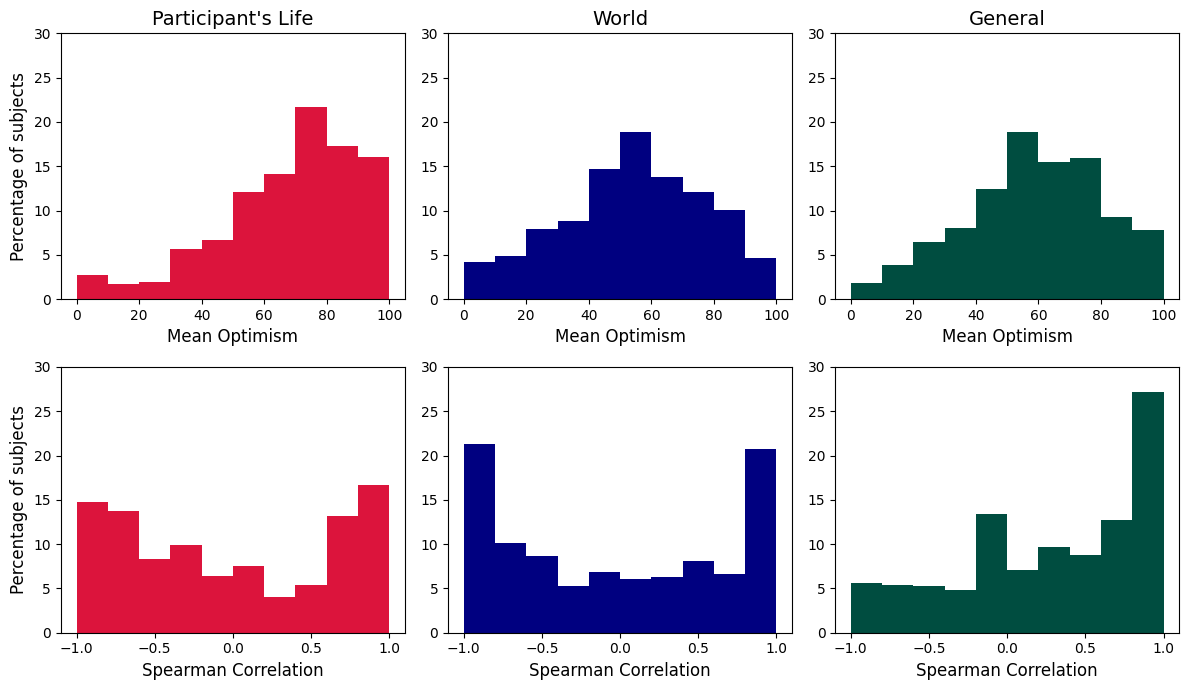

In [22]:
fig, axs = plt.subplots(2,3,figsize=(12,7))

axs[1,0].hist(df_ocs_self['Cor_Optimism'].dropna(),weights=np.ones(len(df_ocs_self['Cor_Optimism'].dropna())) / len(df_ocs_self['Cor_Optimism'].dropna())*100,color='#dc143c')
axs[1,0].set_ylim(0,30)
axs[1,0].set_ylabel("Percentage of subjects",fontsize=12)
axs[1,0].set_xlabel("Spearman Correlation",fontsize=12)
axs[0,0].set_title("Participant's Life",fontsize=14)

axs[1,1].hist(df_ocs_world['Cor_Optimism'].dropna(),weights=np.ones(len(df_ocs_world['Cor_Optimism'].dropna())) / len(df_ocs_world['Cor_Optimism'].dropna())*100,color='#000080')
axs[1,1].set_ylim(0,30)
axs[1,1].set_xlabel("Spearman Correlation",fontsize=12)
axs[0,1].set_title("World",fontsize=14)

axs[1,2].hist(df_ocs['Cor_Optimism'].dropna(),weights=np.ones(len(df_ocs['Cor_Optimism'].dropna())) / len(df_ocs['Cor_Optimism'].dropna())*100,color='#004D40')
axs[1,2].set_ylim(0,30)
axs[1,2].set_xlabel("Spearman Correlation",fontsize=12)
axs[0,2].set_title("General",fontsize=14)


axs[0,0].hist(df_ocs_self['Mean_Optimism'].dropna(),weights=np.ones(len(df_ocs_self['Mean_Optimism'].dropna())) / len(df_ocs_self['Mean_Optimism'].dropna())*100,color='#dc143c')
axs[0,0].set_ylim(0,30)
axs[0,0].set_ylabel("Percentage of subjects",fontsize=12)
axs[0,0].set_xlabel("Mean Optimism",fontsize=12)


axs[0,1].hist(df_ocs_world['Mean_Optimism'].dropna(),weights=np.ones(len(df_ocs_world['Mean_Optimism'].dropna())) / len(df_ocs_world['Mean_Optimism'].dropna())*100,color='#000080')
axs[0,1].set_ylim(0,30)
axs[0,1].set_xlabel("Mean Optimism",fontsize=12)

axs[0,2].hist(df_ocs['Mean_Optimism'].dropna(),weights=np.ones(len(df_ocs['Mean_Optimism'].dropna())) / len(df_ocs['Mean_Optimism'].dropna())*100,color='#004D40')
axs[0,2].set_ylim(0,30)
axs[0,2].set_xlabel("Mean Optimism",fontsize=12)

plt.tight_layout()
plt.savefig('plots/fig4_hists_curves.png')
plt.show()

# Study 5

In [23]:
df = pd.read_csv('data/Study_5.csv',low_memory=False)
def clean_data(x):
    if x == " ":
        return(None)
    else:
        return(float(x))

print("Our Life")
print("First let's look at optimistic predictions...")
vars_ = ['PositiveRightNow1.10','OptimisticLife1.9','PositiveRightNow1.9']
vars_new = ['t_10_pos','t_9_opt','t_9_pos']
df_temp = df[vars_]
df_temp[vars_new[0]] = df_temp[vars_[0]].apply(lambda x: clean_data(x))
df_temp[vars_new[1]] = df_temp[vars_[1]].apply(lambda x: clean_data(x))
df_temp[vars_new[2]] = df_temp[vars_[2]].apply(lambda x: clean_data(x))
df_temp = df_temp[vars_new].dropna()

print("\nDescriptives")
print('T9 Pos - mean:',round(df_temp['t_9_pos'].mean(),2),'SD:',round(df_temp['t_9_pos'].std(),2),'Normal:',stats.normaltest(df_temp['t_9_pos']))
print('T9 opt - mean:',round(df_temp['t_9_opt'].mean(),2),'SD:',round(df_temp['t_9_opt'].std(),2),'Normal:',stats.normaltest(df_temp['t_9_opt']))
print('T10 Pos - mean:',round(df_temp['t_10_pos'].mean(),2),'SD:',round(df_temp['t_10_pos'].std(),2),'Normal:',stats.normaltest(df_temp['t_10_pos']))

df_temp['T9_Opt_rel'] = df_temp['t_9_opt'] - df_temp['t_9_pos']
df_temp['T10_Pos_rel'] = df_temp['t_10_pos'] - df_temp['t_9_pos']
print('T10 Pos rel - mean:',round(df_temp['T10_Pos_rel'].mean(),2),'SD:',round(df_temp['T10_Pos_rel'].std(),2),'Normal:',stats.normaltest(df_temp['T10_Pos_rel']))
print('T9 opt rel - mean:',round(df_temp['T9_Opt_rel'].mean(),2),'SD:',round(df_temp['T9_Opt_rel'].std(),2),'Normal:',stats.normaltest(df_temp['T9_Opt_rel']))

print("\nCorrelations")
print('T9: Pos - opt',stats.spearmanr(df_temp['t_9_opt'],df_temp['t_9_pos']))
print('T9 Pos - T10 Pos',stats.spearmanr(df_temp['t_9_pos'],df_temp['t_10_pos']))
print('T9 Opt - T10 Pos',stats.spearmanr(df_temp['t_9_opt'],df_temp['t_10_pos']))
print('Updated Opt - next month',stats.spearmanr(df_temp['T9_Opt_rel'],df_temp['T10_Pos_rel']))

print("\nDifferences")
print('T9: Pos - opt',stats.wilcoxon(df_temp['t_9_opt'],df_temp['t_9_pos']))
print('T9 Pos - T10 Pos',stats.wilcoxon(df_temp['t_9_pos'],df_temp['t_10_pos']))

print('\n\nNow look at memories')
vars_ = ['PositiveRightNow1.10','PositiveLife1.10','PositiveRightNow1.9']
vars_new = ['t_10_pos','t_10_past','t_9_pos']
df_temp = df[vars_].dropna()
df_temp[vars_new[0]] = df_temp[vars_[0]].apply(lambda x: clean_data(x))
df_temp[vars_new[1]] = df_temp[vars_[1]].apply(lambda x: clean_data(x))
df_temp[vars_new[2]] = df_temp[vars_[2]].apply(lambda x: clean_data(x))
df_temp = df_temp[vars_new].dropna()
print("\nDescriptives")
print('T10 rem - mean:',round(df_temp['t_10_past'].mean(),2),'SD:',round(df_temp['t_10_past'].std(),2),'Normal:',stats.normaltest(df_temp['t_10_past']))
df_temp['T10_Rem_rel'] = df_temp['t_10_pos'] - df_temp['t_10_past']
df_temp['T9_Pos_rel'] = df_temp['t_10_pos'] - df_temp['t_9_pos']
print('T10 Rem rel - mean:',round(df_temp['T10_Rem_rel'].mean(),2),'SD:',round(df_temp['T10_Rem_rel'].std(),2),'Normal:',stats.normaltest(df_temp['T10_Rem_rel']))
print('T9 pos rel - mean:',round(df_temp['T9_Pos_rel'].mean(),2),'SD:',round(df_temp['T9_Pos_rel'].std(),2),'Normal:',stats.normaltest(df_temp['T9_Pos_rel']))

print("\nCorrelations")
print('T10: Pos - Past',stats.spearmanr(df_temp['t_10_past'],df_temp['t_10_pos']))
print('T10 Past - T9 Pos',stats.spearmanr(df_temp['t_10_past'],df_temp['t_9_pos']))
print('\nUpdated Rem - last month',stats.spearmanr(df_temp['T10_Rem_rel'],df_temp['T9_Pos_rel']))

print("\nDifferences")
print('T10: Pos - Past',stats.wilcoxon(df_temp['t_10_past'],df_temp['t_10_pos']))

    
print('\n\n')
    
print("The World")
print("First let's look at optimistic predictions...")
vars_ = ['PositiveRightNow2.10','OptimisticWorld1.9','PositiveRightNow2.9']
vars_new = ['t_10_pos','t_9_opt','t_9_pos']
df_temp = df[vars_]
df_temp[vars_new[0]] = df_temp[vars_[0]].apply(lambda x: clean_data(x))
df_temp[vars_new[1]] = df_temp[vars_[1]].apply(lambda x: clean_data(x))
df_temp[vars_new[2]] = df_temp[vars_[2]].apply(lambda x: clean_data(x))
df_temp = df_temp[vars_new].dropna()

print("\nDescriptives")
print('T9 Pos - mean:',round(df_temp['t_9_pos'].mean(),2),'SD:',round(df_temp['t_9_pos'].std(),2),'Normal:',stats.normaltest(df_temp['t_9_pos']))
print('T9 opt - mean:',round(df_temp['t_9_opt'].mean(),2),'SD:',round(df_temp['t_9_opt'].std(),2),'Normal:',stats.normaltest(df_temp['t_9_opt']))
print('T10 Pos - mean:',round(df_temp['t_10_pos'].mean(),2),'SD:',round(df_temp['t_10_pos'].std(),2),'Normal:',stats.normaltest(df_temp['t_10_pos']))

df_temp['T9_Opt_rel'] = df_temp['t_9_opt'] - df_temp['t_9_pos']
df_temp['T10_Pos_rel'] = df_temp['t_10_pos'] - df_temp['t_9_pos']
print('T10 Pos rel - mean:',round(df_temp['T10_Pos_rel'].mean(),2),'SD:',round(df_temp['T10_Pos_rel'].std(),2),'Normal:',stats.normaltest(df_temp['T10_Pos_rel']))
print('T9 opt rel - mean:',round(df_temp['T9_Opt_rel'].mean(),2),'SD:',round(df_temp['T9_Opt_rel'].std(),2),'Normal:',stats.normaltest(df_temp['T9_Opt_rel']))

print("\nCorrelations")
print('T9: Pos - opt',stats.spearmanr(df_temp['t_9_opt'],df_temp['t_9_pos']))
print('T9 Pos - T10 Pos',stats.spearmanr(df_temp['t_9_pos'],df_temp['t_10_pos']))
print('T9 Opt - T10 Pos',stats.spearmanr(df_temp['t_9_opt'],df_temp['t_10_pos']))
print('Updated Opt - next month',stats.spearmanr(df_temp['T9_Opt_rel'],df_temp['T10_Pos_rel']))

print("\nDifferences")
print('T9: Pos - opt',stats.wilcoxon(df_temp['t_9_opt'],df_temp['t_9_pos']))
print('T9 Pos - T10 Pos',stats.wilcoxon(df_temp['t_9_pos'],df_temp['t_10_pos']))

print('\n\nNow look at memories')
vars_ = ['PositiveRightNow2.10','PositiveWorld1.10','PositiveRightNow2.9']
vars_new = ['t_10_pos','t_10_past','t_9_pos']
df_temp = df[vars_].dropna()
df_temp[vars_new[0]] = df_temp[vars_[0]].apply(lambda x: clean_data(x))
df_temp[vars_new[1]] = df_temp[vars_[1]].apply(lambda x: clean_data(x))
df_temp[vars_new[2]] = df_temp[vars_[2]].apply(lambda x: clean_data(x))
df_temp = df_temp[vars_new].dropna()
print("\nDescriptives")
print('T10 rem - mean:',round(df_temp['t_10_past'].mean(),2),'SD:',round(df_temp['t_10_past'].std(),2),'Normal:',stats.normaltest(df_temp['t_10_past']))
df_temp['T10_Rem_rel'] = df_temp['t_10_pos'] - df_temp['t_10_past']
df_temp['T9_Pos_rel'] = df_temp['t_10_pos'] - df_temp['t_9_pos']
print('T10 Rem rel - mean:',round(df_temp['T10_Rem_rel'].mean(),2),'SD:',round(df_temp['T10_Rem_rel'].std(),2),'Normal:',stats.normaltest(df_temp['T10_Rem_rel']))
print('T9 pos rel - mean:',round(df_temp['T9_Pos_rel'].mean(),2),'SD:',round(df_temp['T9_Pos_rel'].std(),2),'Normal:',stats.normaltest(df_temp['T9_Pos_rel']))

print("\nCorrelations")
print('T10: Pos - Past',stats.spearmanr(df_temp['t_10_past'],df_temp['t_10_pos']))
print('T10 Past - T9 Pos',stats.spearmanr(df_temp['t_10_past'],df_temp['t_9_pos']))
print('\nUpdated Rem - last month',stats.spearmanr(df_temp['T10_Rem_rel'],df_temp['T9_Pos_rel']))
print("\nDifferences")
print('T10: Pos - Past',stats.wilcoxon(df_temp['t_10_past'],df_temp['t_10_pos']))

Our Life
First let's look at optimistic predictions...

Descriptives
T9 Pos - mean: 68.6 SD: 24.2 Normal: NormaltestResult(statistic=34.766055304573335, pvalue=2.822584886902756e-08)
T9 opt - mean: 65.93 SD: 24.96 Normal: NormaltestResult(statistic=26.797069260575142, pvalue=1.5173659859708686e-06)
T10 Pos - mean: 67.56 SD: 24.86 Normal: NormaltestResult(statistic=34.24541335568941, pvalue=3.6618704402022004e-08)
T10 Pos rel - mean: -1.04 SD: 14.36 Normal: NormaltestResult(statistic=43.350817223475005, pvalue=3.8591321176251457e-10)
T9 opt rel - mean: -2.68 SD: 13.52 Normal: NormaltestResult(statistic=179.02954143662583, pvalue=1.3311562273627014e-39)

Correlations
T9: Pos - opt SpearmanrResult(correlation=0.8538741491496448, pvalue=3.766127797352489e-100)
T9 Pos - T10 Pos SpearmanrResult(correlation=0.8286381149574009, pvalue=3.376147236769138e-89)
T9 Opt - T10 Pos SpearmanrResult(correlation=0.7794277005481381, pvalue=2.967069689238775e-72)
Updated Opt - next month SpearmanrResult(co

/var/folders/q9/lf93qdy52mdg6txk_rbwwp000000gp/T/ipykernel_96325/2899165776.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[vars_new[0]] = df_temp[vars_[0]].apply(lambda x: clean_data(x))
/var/folders/q9/lf93qdy52mdg6txk_rbwwp000000gp/T/ipykernel_96325/2899165776.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[vars_new[1]] = df_temp[vars_[1]].apply(lambda x: clean_data(x))
/var/folders/q9/lf93qdy52mdg6txk_rbwwp000000gp/T/ipykernel_96325/2899165776.py:15: SettingWithCopyWarning: 
A 

/var/folders/q9/lf93qdy52mdg6txk_rbwwp000000gp/T/ipykernel_96325/2386610034.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[vars_new[0]] = df_temp[vars_[0]].apply(lambda x: clean_data(x))
/var/folders/q9/lf93qdy52mdg6txk_rbwwp000000gp/T/ipykernel_96325/2386610034.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp[vars_new[1]] = df_temp[vars_[1]].apply(lambda x: clean_data(x))
/var/folders/q9/lf93qdy52mdg6txk_rbwwp000000gp/T/ipykernel_96325/2386610034.py:6: SettingWithCopyWarning: 
A val

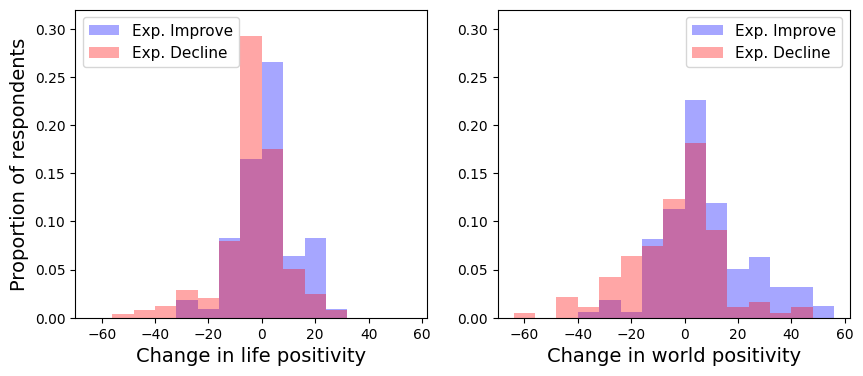

In [24]:
vars_ = ['PositiveRightNow1.10','OptimisticLife1.9','PositiveRightNow1.9']
vars_new = ['t_10_pos','t_9_opt','t_9_pos']
df_temp = df[vars_]
df_temp[vars_new[0]] = df_temp[vars_[0]].apply(lambda x: clean_data(x))
df_temp[vars_new[1]] = df_temp[vars_[1]].apply(lambda x: clean_data(x))
df_temp[vars_new[2]] = df_temp[vars_[2]].apply(lambda x: clean_data(x))
df_temp = df_temp[vars_new].dropna()
df_temp['T9_Opt_rel'] = df_temp['t_9_opt'] - df_temp['t_9_pos']
df_temp['rel'] = df_temp['t_10_pos'] - df_temp['t_9_pos']
df_better = df_temp.loc[df_temp['T9_Opt_rel'] >0]
df_worse = df_temp.loc[df_temp['T9_Opt_rel'] <=0]



# Then create the world frame
vars_ = ['PositiveRightNow2.10','OptimisticWorld1.9','PositiveRightNow2.9']
vars_new = ['t_10_pos','t_9_opt_w','t_9_pos']
df_temp = df[vars_]
df_temp[vars_new[0]] = df_temp[vars_[0]].apply(lambda x: clean_data(x))
df_temp[vars_new[1]] = df_temp[vars_[1]].apply(lambda x: clean_data(x))
df_temp[vars_new[2]] = df_temp[vars_[2]].apply(lambda x: clean_data(x))
df_temp = df_temp[vars_new].dropna()
df_temp['T9_Opt_rel'] = df_temp['t_9_opt_w'] - df_temp['t_9_pos']
df_temp['rel'] = df_temp['t_10_pos'] - df_temp['t_9_pos']
df_better_world = df_temp.loc[df_temp['T9_Opt_rel'] >0]
df_worse_world = df_temp.loc[df_temp['T9_Opt_rel'] <=0]



fig, axs = plt.subplots(1,2,figsize=(10,4))

better, worse = [],[]
for i in range(15):
    j = (i+1)*10-80
    
    a = df_better.loc[(df_better['rel'] > i*10-80) & (df_better['rel'] < j)]
    better.append(a['rel'].count()/df_better['rel'].count())
    b = df_worse.loc[(df_worse['rel'] > i*10-80) & (df_worse['rel'] < j)]
    worse.append(b['rel'].count()/df_worse['rel'].count())
    
axs[0].bar([i*8-60 for i in range(15)],better,alpha=0.35,color='blue',width=8,label='Exp. Improve')
axs[0].bar([i*8-60 for i in range(15)],worse,alpha=0.35,color='red',width=8,label='Exp. Decline')
axs[0].set_ylabel('Proportion of respondents',fontsize=14)
axs[0].set_xlabel('Change in life positivity',fontsize=14)
axs[0].legend(fontsize=11)
axs[0].set_ylim(0,.32)

better, worse = [],[]
for i in range(15):
    j = (i+1)*10-80
    
    a = df_better_world.loc[(df_better_world['rel'] > i*10-80) & (df_better_world['rel'] < j)]
    better.append(a['rel'].count()/df_better_world['rel'].count())
    b = df_worse_world.loc[(df_worse_world['rel'] > i*10-80) & (df_worse_world['rel'] < j)]
    worse.append(b['rel'].count()/df_worse_world['rel'].count())
    
axs[1].bar([i*8-60 for i in range(15)],better,alpha=0.35,color='blue',width=8,label='Exp. Improve')
axs[1].bar([i*8-60 for i in range(15)],worse,alpha=0.35,color='red',width=8,label='Exp. Decline')
axs[1].set_xlabel('Change in world positivity',fontsize=14)
axs[1].legend(fontsize=11)
axs[1].set_ylim(0,.32)

plt.savefig('plots/fig5_histograms_expected_change.png')
plt.show()
